In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
from tensorflow.keras.utils import image_dataset_from_directory

In [26]:
training_set = image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 76515 files belonging to 4 classes.


In [27]:
validation_set = image_dataset_from_directory(
    'val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 21861 files belonging to 4 classes.


In [28]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [29]:
INPUT_SHAPE = (224, 224, 3)

In [30]:
mobnet = tf.keras.applications.MobileNetV3Large(
    input_shape=INPUT_SHAPE,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
    # name="MobileNetV3Large",
)

In [31]:
#mobnet.trainable = False #--used to freeze weights of this pretrained model 

In [32]:
model = tf.keras.models.Sequential()

In [33]:
model.add(tf.keras.Input(shape=INPUT_SHAPE))

In [35]:
model.add(mobnet)

In [40]:
model.add(tf.keras.layers.Dense(units = 4,activation='softmax'))

In [41]:
metrics_list = ['accuracy',
                tf.keras.metrics.F1Score()]

In [42]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=metrics_list)

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Function  (None, 1000)              5507432   
 al)                                                             
                                                                 
 dense (Dense)               (None, 4)                 4004      
                                                                 
Total params: 5511436 (21.02 MB)
Trainable params: 5487036 (20.93 MB)
Non-trainable params: 24400 (95.31 KB)
_________________________________________________________________


In [44]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
2392/2392 [==============================] - 987s 411ms/step - loss: 1.1454 - accuracy: 0.8422 - f1_score: 0.5950 - val_loss: 0.9870 - val_accuracy: 0.8807 - val_f1_score: 0.6714
Epoch 2/15
2392/2392 [==============================] - 1140s 477ms/step - loss: 0.8648 - accuracy: 0.8877 - f1_score: 0.6841 - val_loss: 0.7606 - val_accuracy: 0.8642 - val_f1_score: 0.6772
Epoch 3/15
2392/2392 [==============================] - 1151s 481ms/step - loss: 0.6702 - accuracy: 0.8858 - f1_score: 0.6883 - val_loss: 0.6100 - val_accuracy: 0.8930 - val_f1_score: 0.6908
Epoch 4/15
2392/2392 [==============================] - 1434s 599ms/step - loss: 0.5357 - accuracy: 0.9060 - f1_score: 0.7901 - val_loss: 0.4866 - val_accuracy: 0.9312 - val_f1_score: 0.8855
Epoch 5/15
2392/2392 [==============================] - 1414s 591ms/step - loss: 0.4321 - accuracy: 0.9422 - f1_score: 0.8972 - val_loss: 0.3957 - val_accuracy: 0.9452 - val_f1_score: 0.9002
Epoch 6/15
2392/2392 [========================

In [45]:
model.save("Trained_Model.h5")

/Users/animesh/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
model.save("Trained_Model.keras")

In [47]:
# Saving history
with open('Training_history.pkl', 'wb') as f:
    pickle.dump(training_history.history, f)

In [4]:
#Reloading History from pickle
with open('Training_history.pkl', 'rb') as f:
    load_history = pickle.load(f)
load_history

{'loss': [1.1453802585601807,
  0.8648024201393127,
  0.6702404618263245,
  0.5356669425964355,
  0.4320599436759949,
  0.3479674160480499,
  0.28923746943473816,
  0.24451656639575958,
  0.20830342173576355,
  0.18285790085792542,
  0.1699090301990509,
  0.1487247496843338,
  0.1339232176542282,
  0.12125182151794434,
  0.11251933872699738],
 'accuracy': [0.8422400951385498,
  0.887708306312561,
  0.8857740163803101,
  0.9060314893722534,
  0.9422466158866882,
  0.9499706029891968,
  0.9534600973129272,
  0.9567012786865234,
  0.9605175256729126,
  0.962582528591156,
  0.9621120095252991,
  0.9666078686714172,
  0.9693262577056885,
  0.9716918468475342,
  0.9733254909515381],
 'f1_score': [array([0.8814868 , 0.57463247, 0.00095801, 0.92311895], dtype=float32),
  array([0.9090779 , 0.8804841 , 0.        , 0.94674116], dtype=float32),
  array([0.9392844 , 0.89636165, 0.        , 0.9176859 ], dtype=float32),
  array([0.9481992 , 0.90421456, 0.37415048, 0.9337706 ], dtype=float32),
  arra

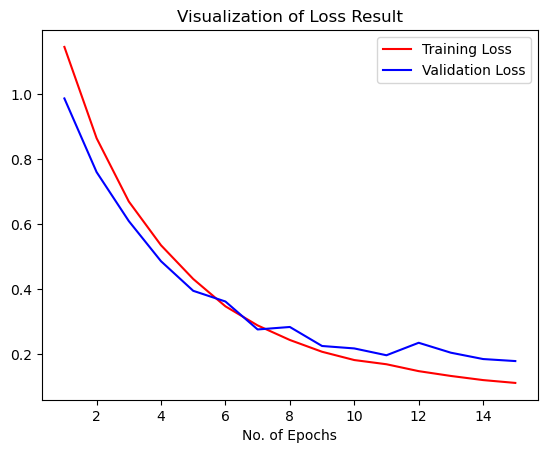

In [6]:
#Loss Visualization
epochs = [i for i in range(1,16)]
plt.plot(epochs,load_history['loss'],color='red',label='Training Loss')
plt.plot(epochs,load_history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()

In [49]:
test_set = validation_set = image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10934 files belonging to 4 classes.


In [50]:
test_loss,test_acc,f1_score = model.evaluate(test_set)

171/171 [==============================] - 65s 368ms/step - loss: 0.1883 - accuracy: 0.9476 - f1_score: 0.9092


In [51]:
test_loss

0.18832968175411224

In [52]:
test_acc

0.9475946426391602

In [53]:
f1_score

array([0.96402097, 0.9143881 , 0.78808314, 0.9702022 ], dtype=float32)

## Model Evaluation

In [3]:
model = tf.keras.models.load_model("Trained_Model.h5")

2024-11-02 10:47:59.283337: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-11-02 10:47:59.283412: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-11-02 10:47:59.283424: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-11-02 10:47:59.283503: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-02 10:47:59.283731: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Function  (None, 1000)              5507432   
 al)                                                             
                                                                 
 dense (Dense)               (None, 4)                 4004      
                                                                 
Total params: 5511436 (21.02 MB)
Trainable params: 5487036 (20.93 MB)
Non-trainable params: 24400 (95.31 KB)
_________________________________________________________________


In [5]:
test_set = validation_set = image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10934 files belonging to 4 classes.


In [6]:
##Computing True labels from test set
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [7]:
Y_true

<tf.Tensor: shape=(10934,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [8]:
##Computing Predicted labels using test set
predicted_categories = model.predict(test_set)
Y_pred = tf.argmax(predicted_categories, axis=1)

2024-11-02 10:48:14.359978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


171/171 [==============================] - 31s 175ms/step


In [9]:
Y_true

<tf.Tensor: shape=(10934,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [10]:
Y_pred

<tf.Tensor: shape=(10934,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

### 1. Classification Report

In [11]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3746
           1       0.95      0.88      0.91      1161
           2       0.79      0.79      0.79       888
           3       0.96      0.99      0.97      5139

    accuracy                           0.95     10934
   macro avg       0.92      0.90      0.91     10934
weighted avg       0.95      0.95      0.95     10934



### 2. Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true,Y_pred)
cm

array([[3577,   23,  122,   24],
       [  19, 1020,   13,  109],
       [  75,   10,  701,  102],
       [   4,   17,   55, 5063]])

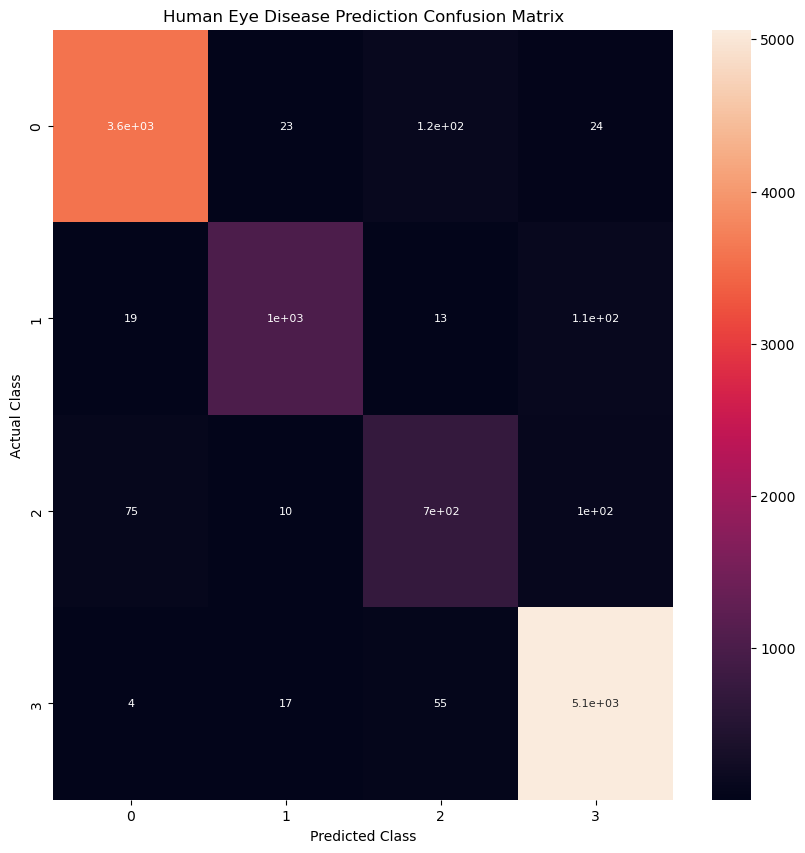

In [18]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,annot_kws={"size":8})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Human Eye Disease Prediction Confusion Matrix",fontsize=12)
plt.show()